Nama : Melisa Damayanti
Email : melisadamayanti97@gmail.com

In [ ]:
#langkah pertama dalam membuat klasifikasi gambar adalah dengan menyiapkan library tensorflow dan sklearn

In [ ]:
import tensorflow as tf

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-16 02:38:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  3.55MB/s    in 95s     

2021-06-16 02:40:07 (3.24 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



selanjutnya mempersiapkan data yang akan digunakan

In [ ]:
# melakukan ekstraksi pada file zip
import os
import zipfile
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
#membuat folder untuk gunting batu kertas
import os
scissors = os.path.join('/content/rockpaperscissors/scissors')
rock = os.path.join('/content/rockpaperscissors/rock')
paper = os.path.join('/content/rockpaperscissors/paper')

In [ ]:
scissorsfile = os.listdir(scissors)
rockfile = os.listdir(rock)
paper = os.listdir(paper)

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
Database = "/content/rockpaperscissors/rps-cv-images"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range= 0.2,
    fill_mode = "nearest",
    validation_split = 0.4)

In [ ]:
train_gen = train_datagen.flow_from_directory(Database, 
    target_size=(150, 150), 
    class_mode='categorical', 
    batch_size=30,
    subset='training', 
    interpolation='nearest')

val_gen = train_datagen.flow_from_directory(Database, 
    target_size=(150, 150), 
    class_mode='categorical', 
    batch_size=30,
    subset='validation', 
    interpolation='nearest')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
import keras

Model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 15, 15, 128)     

In [ ]:
#kompilasi model
Model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit 
Model.fit(
      train_gen,
      steps_per_epoch=25,
      epochs=25,
      validation_data= val_gen,
      validation_steps=4,
      verbose = 2
      )

Epoch 1/25
25/25 - 20s - loss: 1.1107 - accuracy: 0.3239 - val_loss: 1.0862 - val_accuracy: 0.5000
Epoch 2/25
25/25 - 19s - loss: 1.0741 - accuracy: 0.4315 - val_loss: 1.0478 - val_accuracy: 0.3500
Epoch 3/25
25/25 - 19s - loss: 1.0756 - accuracy: 0.4180 - val_loss: 1.0300 - val_accuracy: 0.4583
Epoch 4/25
25/25 - 19s - loss: 1.0376 - accuracy: 0.4373 - val_loss: 1.0578 - val_accuracy: 0.4000
Epoch 5/25
25/25 - 19s - loss: 0.9824 - accuracy: 0.4840 - val_loss: 0.8645 - val_accuracy: 0.5833
Epoch 6/25
25/25 - 19s - loss: 0.9158 - accuracy: 0.5457 - val_loss: 0.9065 - val_accuracy: 0.5417
Epoch 7/25
25/25 - 19s - loss: 0.8272 - accuracy: 0.6156 - val_loss: 0.7108 - val_accuracy: 0.6667
Epoch 8/25
25/25 - 19s - loss: 0.7554 - accuracy: 0.6680 - val_loss: 0.6282 - val_accuracy: 0.8333
Epoch 9/25
25/25 - 19s - loss: 0.5913 - accuracy: 0.7594 - val_loss: 0.6663 - val_accuracy: 0.6750
Epoch 10/25
25/25 - 19s - loss: 0.5346 - accuracy: 0.7823 - val_loss: 0.4766 - val_accuracy: 0.8583
Epoch 11/

Saving WhatsApp Image 2021-06-16 at 11.33.00.png to WhatsApp Image 2021-06-16 at 11.33.00 (8).png
WhatsApp Image 2021-06-16 at 11.33.00.png
Kertas


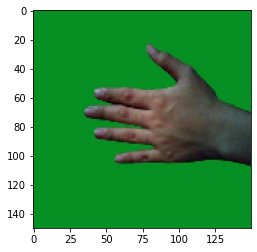

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = Model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')
  else:
    print("Tidak Tahu")
